In [4]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [5]:
# read auto dataset and convert all columns to numeric
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
df = pd.read_csv(url, sep='\\s+')
df.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name']
df.horsepower = pd.to_numeric(df.horsepower, errors='coerce')
df.car_name = df.car_name.astype('string')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    391 non-null    float64
 4   weight        397 non-null    float64
 5   acceleration  397 non-null    float64
 6   model_year    397 non-null    int64  
 7   origin        397 non-null    int64  
 8   car_name      397 non-null    string 
dtypes: float64(5), int64(3), string(1)
memory usage: 28.0 KB


In [6]:
# Filter dataset rows where horsepower is not null
df = df[df.horsepower.notnull()]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 391 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           391 non-null    float64
 1   cylinders     391 non-null    int64  
 2   displacement  391 non-null    float64
 3   horsepower    391 non-null    float64
 4   weight        391 non-null    float64
 5   acceleration  391 non-null    float64
 6   model_year    391 non-null    int64  
 7   origin        391 non-null    int64  
 8   car_name      391 non-null    string 
dtypes: float64(5), int64(3), string(1)
memory usage: 30.5 KB


In [7]:
# Split into 75-25 training-test datasets
X_train, X_test, y_train, y_test = train_test_split(df[['horsepower']], df['mpg'], test_size=0.25, random_state=101)

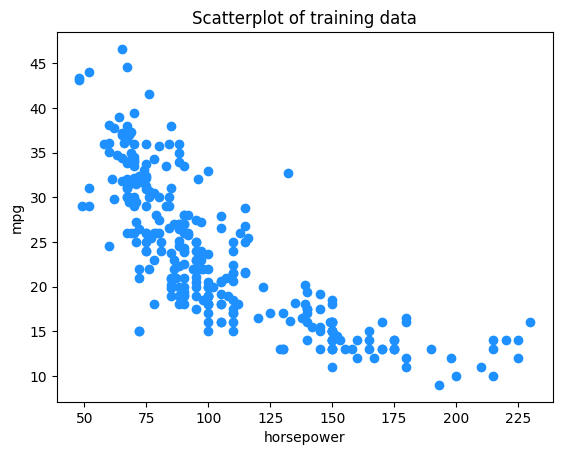

In [8]:
# Plot training data scatterplot
plt.scatter(X_train, y_train, color='dodgerblue')
plt.title('Scatterplot of training data')
plt.xlabel('horsepower')
plt.ylabel('mpg')
plt.show()

In [9]:
# Generate polynomial features up to degree 2
transformer = PolynomialFeatures(degree=2, include_bias=True)
X_poly_train = transformer.fit_transform(X_train)
X_poly_test = transformer.fit_transform(X_test)

In [10]:
def plot_hp_mpg_predict(x_test,y_test,y_predict):
    plt.scatter(x_test, y_test, color='dodgerblue')
    sorted_Xy = sorted(zip(x_test.horsepower, y_predict))
    X_s, y_s = zip(*sorted_Xy)
    plt.plot(X_s, y_s, color='red')
    plt.xlabel('horsepower')
    plt.ylabel('mpg')
    plt.show()

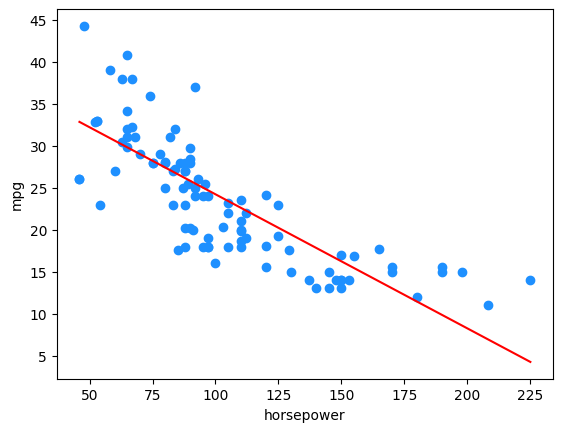

In [11]:
# Fit simple linear regression model
model = LinearRegression()
model= model.fit(X_train, y_train)
y_predict = model.predict(X_test)
plot_hp_mpg_predict(X_test,y_test,y_predict)

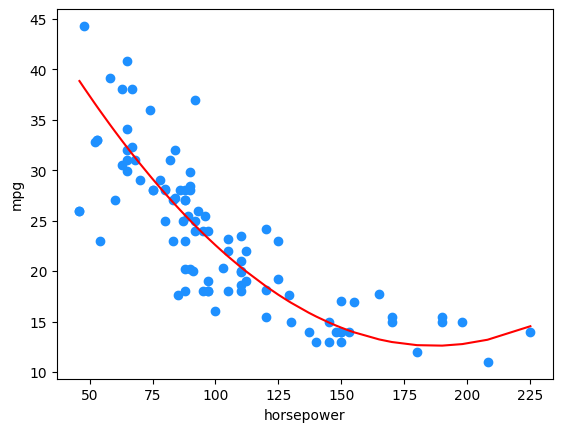

In [12]:
# Fit simple linear regression model with degree 2 polynomial feature
transformer = PolynomialFeatures(degree=2, include_bias=True)
X_poly_train = transformer.fit_transform(X_train)
X_poly_test = transformer.fit_transform(X_test)
model.fit(X_poly_train, y_train)
y_predict = model.predict(X_poly_test)
plot_hp_mpg_predict(X_test,y_test,y_predict)

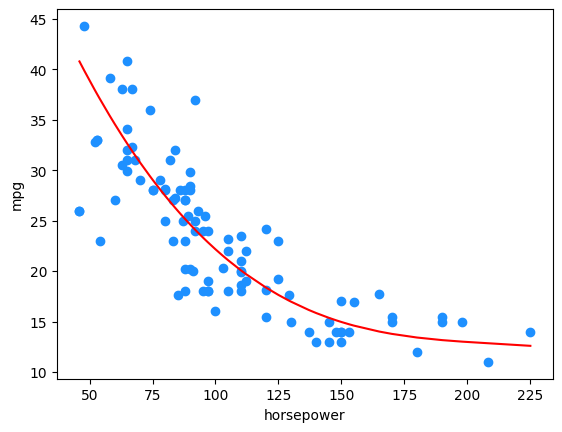

In [13]:
# Fit simple linear regression model with degree 3 polynomial feature
transformer = PolynomialFeatures(degree=3, include_bias=True)
X_poly_train = transformer.fit_transform(X_train)
X_poly_test = transformer.fit_transform(X_test)
model.fit(X_poly_train, y_train)
y_predict = model.predict(X_poly_test)
plot_hp_mpg_predict(X_test,y_test,y_predict)

Text(0.5, 1.0, 'MSE vs. Polynomial Degree')

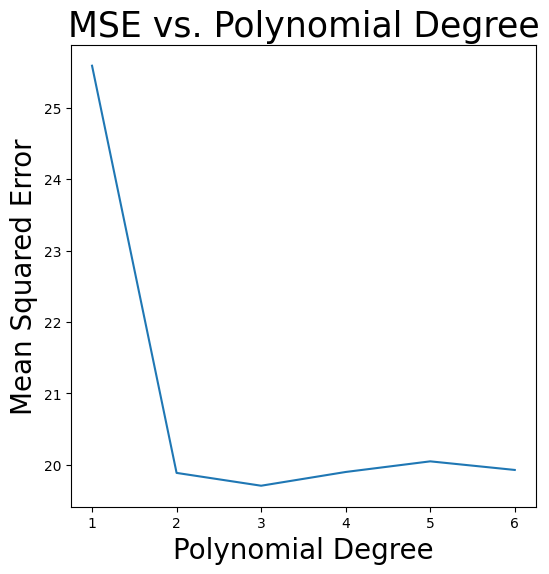

In [14]:
# Use cross-validation o find the max degree polynomial we should use
maxdegree=7
test_error=[]
for d in range(1,maxdegree):
    transformer = PolynomialFeatures(degree=d, include_bias=True)
    X_poly_train = transformer.fit_transform(X_train)
    X_poly_test = transformer.fit_transform(X_test)
    model = model.fit(X_poly_train, y_train)
    y_predict = model.predict(X_poly_test)
    #mse_train = mean_squared_error(y_train, y_predict)
    #training_error.append(mse_train)
    cve=cross_validate(model,X_poly_train,y_train,scoring='neg_mean_squared_error',cv=5,return_train_score=True)
    test_error.append(np.mean(np.absolute(cve['test_score'])))

fig,ax=plt.subplots(figsize=(6,6))
ax.plot(range(1,maxdegree),test_error)
ax.set_xlabel('Polynomial Degree',fontsize=20)
ax.set_ylabel('Mean Squared Error',fontsize=20)
ax.set_title('MSE vs. Polynomial Degree',fontsize=25)

<Axes: xlabel='horsepower', ylabel='weight'>

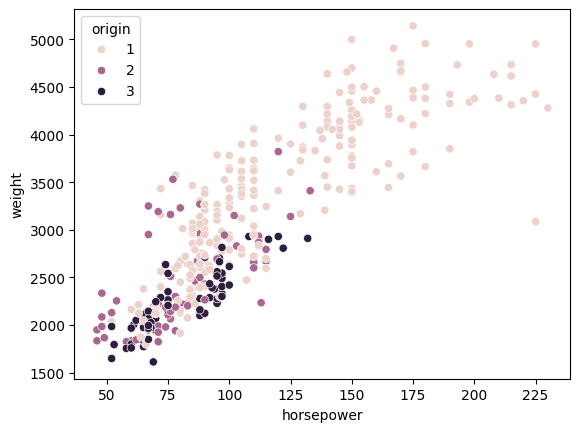

In [15]:
sns.scatterplot(x=df['horsepower'],y=df['weight'], hue=df['origin'])

In [16]:
# Get the features and target data
X = df[['horsepower', 'weight']]
y = df['origin']

In [17]:
# split data into train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [18]:
# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
# Create KNN classifier for k = 1
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6835443037974683


<Axes: >

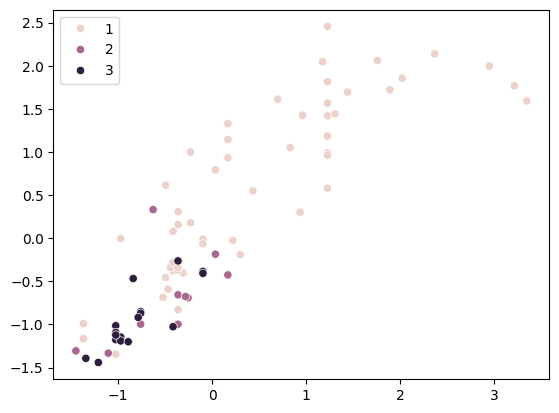

In [27]:
sns.scatterplot(x= X_test[:, 0],y= X_test[:, 1],hue=y_pred)

In [22]:
# run knn from k=1..40
error_rate = []
# Might take some time
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error rate')

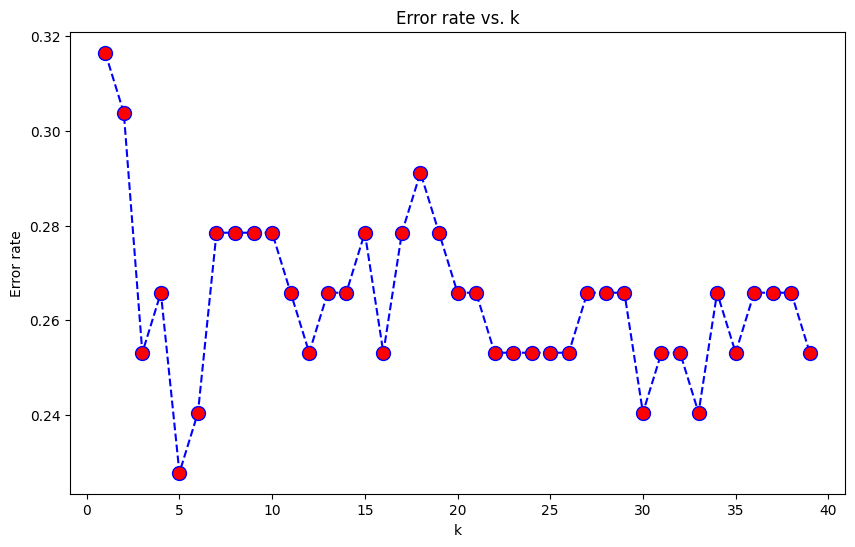

In [24]:
# Plot error rate vs. k
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error rate vs. k')
plt.xlabel('k')
plt.ylabel('Error rate')